This Deep Artificial Neural Network model estimate the discharge capacity of LG 18650HG2 Li-ion Battery throught different voltage and temperature discharge test. 

**Data visualization import**

In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

**Data analysis and manipulation import**

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

**Load data**

 Dataset cite: Kollmeyer, Philip; Vidal, Carlos; Naguib, Mina; Skells, Michael  (2020), “LG 18650HG2 Li-ion Battery Data and Example Deep Neural Network xEV SOC Estimator Script”, Mendeley Data, V3, doi: 10.17632/cp3473x7xv.3

In [3]:
battery_data = '/content/551_Mixed1.csv' # CSV file with discharge test battery variables
#bat_data = pd.read_csv(battery_data,index_col=0)
bat_data = pd.read_csv(battery_data)
bat_data_util = bat_data.drop(['Time Stamp','Step', 'Status', 'Prog Time','Step Time','Cycle','Cycle Level','Procedure','Current','Cnt','WhAccu'], axis=1)
bat_data_util # Voltage, Temperature and Capacity are features and target 

Voltage  Temperature  Capacity
0      4.18464     23.97615  -0.00000
1      4.18396     23.97615  -0.00000
2      4.18363     23.97615  -0.00001
3      4.18363     23.97615  -0.00001
4      4.18346     23.97615  -0.00001
...        ...          ...       ...
77222  3.20273     23.76583  -2.59012
77223  3.20273     23.76583  -2.59012
77224  3.20273     23.76583  -2.59012
77225  3.20273     23.76583  -2.59012
77226  3.20273     23.76583  -2.59012

[77227 rows x 3 columns]

**Data interest visualization**

Voltage discharge test

Text(0, 0.5, 'Voltage (V)')

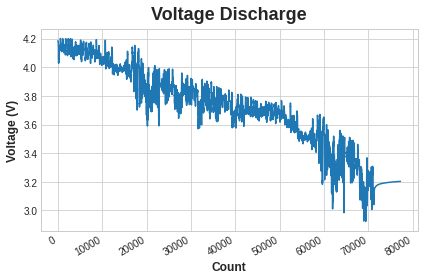

In [4]:
fig, ax = plt.subplots(1)
bat_data_util["Voltage"].plot()
#plt.xticks(rotation=90,ha='right')
fig.autofmt_xdate()

plt.title('Voltage Discharge')
plt.xlabel('Count')
plt.ylabel('Voltage (V)')

Text(0, 0.5, 'Temperature (°C)')

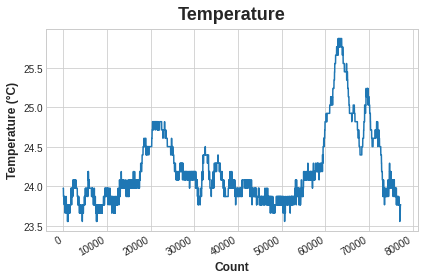

In [34]:
fig, ax = plt.subplots(1)
bat_data_util["Temperature"].plot()
#plt.xticks(rotation=90,ha='right')
fig.autofmt_xdate()

plt.title('Temperature')
plt.xlabel('Count')
plt.ylabel('Temperature (°C)')

Capacity discharge test

Text(0, 0.5, 'Capacity (Ah)')

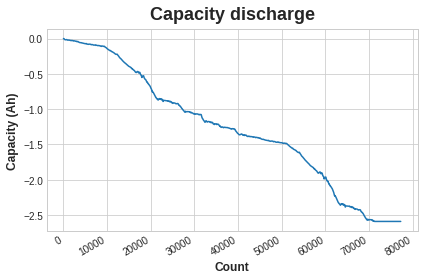

In [5]:
fig, ax = plt.subplots(1)
bat_data_util["Capacity"].plot()
#plt.xticks(rotation=90,ha='right')
fig.autofmt_xdate()

plt.title('Capacity discharge')
plt.xlabel('Count')
plt.ylabel('Capacity (Ah)')

**Create data inputs and output for the Deep Artificial Neural Network**

In [6]:
X = bat_data_util.copy()
y = X.pop('Capacity')

Input data (Voltage and temperature features)

In [7]:
X

Voltage  Temperature
0      4.18464     23.97615
1      4.18396     23.97615
2      4.18363     23.97615
3      4.18363     23.97615
4      4.18346     23.97615
...        ...          ...
77222  3.20273     23.76583
77223  3.20273     23.76583
77224  3.20273     23.76583
77225  3.20273     23.76583
77226  3.20273     23.76583

[77227 rows x 2 columns]

**Data transformation and preparation**

This code is under review

In [8]:
# preprocessor = make_column_transformer(
#     (StandardScaler(),
#      make_column_selector(dtype_include=np.number)),
#     (OneHotEncoder(sparse=False),
#      make_column_selector(dtype_include=object)),
# )

In [9]:
# X = preprocessor.fit_transform(X)
# y = np.log(y) # log transform target instead of standardizing

Input_shape for DNN model

In [10]:
input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [2]


**Data standarizacion**

Convert all inputs to values ​​between [0,1]

In [11]:
# Create training and validation splits
df_train = bat_data_util.sample(frac=0.7, random_state=0)
df_valid = bat_data_util.drop(df_train.index)
#display(df_train.head(4))
display(df_valid.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)
#display(df_train.head(4))

# Split features and target
X_train = df_train.drop('Capacity', axis=1)
X_valid = df_valid.drop('Capacity', axis=1)
y_train = df_train['Capacity']
y_valid = df_valid['Capacity']
#display(y_train.head(4))

Voltage  Temperature  Capacity
2   4.18363     23.97615  -0.00001
8   4.18346     23.97615  -0.00002
10  4.18329     23.97615  -0.00003
12  4.18329     23.97615  -0.00003

In [12]:
df_train.index

Int64Index([  962, 17668, 33061, 63879, 74804,  2765, 64182,   937, 36929,
            23335,
            ...
             2214, 49418, 38236, 59498,  9641, 44131, 53138, 56615, 53784,
             1277],
           dtype='int64', length=54059)

**Model imports: Tensorflow library and Keras API**

In [13]:
from tensorflow import keras
from tensorflow.keras import layers # This warning don't affect the model flow (It tells about Tensorflow version)

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),    
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

**Loss and optimizer model configuration**

In [14]:
model.compile(
    optimizer="adam", # Adam algorith is based on Stochastic Gradient Descent (SDG)
    loss="mae", # Under expetimental with different loss fuction
)

**Train model: X,y data for batteries discharge test**

This code is under experimental 

In [15]:
history = model.fit(
    X_train, y_train, # X: voltage and temperature, y: capacity
    validation_data=(X_valid, y_valid),
    batch_size=128, # seed the DNN with data
    epochs=100, # Iterations in the model
    verbose=0,
)

**Native plot pandas library - plot loss results**

Text(0, 0.5, 'Loss')

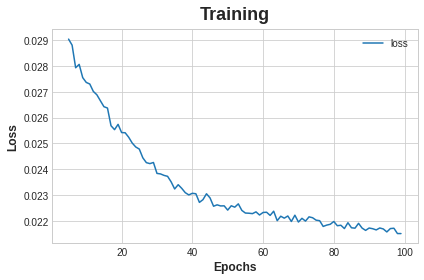

In [16]:
import pandas as pd

history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[5:, ['loss']].plot();
#print("Minimum Validation Loss: {:0.4f}".format(history_df['loss'].min()));
plt.title('Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In this point differents optimizer, loss function and results are reviewed for train the model. This model uses Tensorflow library and Keras API to get interest characteristic. 

Google Colab is prefered because all artificial intelligence libraries are avaliable.

**Baseline model**

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 25,217
Trainable params: 25,217
Non-trainable params: 0
_________________________________________________________________


In [18]:
...

Ellipsis

**Evaluate baseline**

Minimum Validation Loss: 0.0212


Text(0, 0.5, 'Loss')

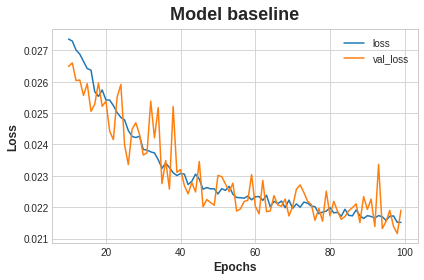

In [19]:
# Start the plot at epoch 10
history_df.loc[10:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

plt.title('Model baseline')
plt.xlabel('Epochs')
plt.ylabel('Loss')

**Test capacity and Stopping Callback effect**

In [20]:
from tensorflow.keras import callbacks

# YOUR CODE HERE: define an early stopping callback
early_stopping = callbacks.EarlyStopping(
    min_delta = 0.001,
    patience = 10,
    restore_best_weights = True
    )

Epoch 1/100
106/106 [==============================] - 2s 13ms/step - loss: 0.0737 - val_loss: 0.0417
Epoch 2/100
106/106 [==============================] - 1s 12ms/step - loss: 0.0403 - val_loss: 0.0396
Epoch 3/100
106/106 [==============================] - 1s 12ms/step - loss: 0.0377 - val_loss: 0.0366
Epoch 4/100
106/106 [==============================] - 1s 13ms/step - loss: 0.0364 - val_loss: 0.0346
Epoch 5/100
106/106 [==============================] - 1s 12ms/step - loss: 0.0347 - val_loss: 0.0333
Epoch 6/100
106/106 [==============================] - 1s 13ms/step - loss: 0.0334 - val_loss: 0.0324
Epoch 7/100
106/106 [==============================] - 1s 12ms/step - loss: 0.0322 - val_loss: 0.0326
Epoch 8/100
106/106 [==============================] - 1s 11ms/step - loss: 0.0313 - val_loss: 0.0300
Epoch 9/100
106/106 [==============================] - 1s 12ms/step - loss: 0.0304 - val_loss: 0.0291
Epoch 10/100
106/106 [==============================] - 2s 20ms/step - loss: 0.029

Text(0, 0.5, 'Loss/Val_loss')

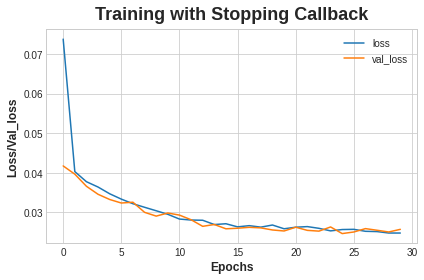

In [21]:
from tensorflow import keras
from tensorflow.keras import layers # This warning don't affect the model flow (It tells about Tensorflow version)

model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=input_shape),
    layers.Dense(256, activation='relu'),    
    layers.Dense(128, activation='relu'),
    layers.Dense(1),
])

model.compile(
    optimizer="adam", # Adam algorith is based on Stochastic Gradient Descent (SDG)
    loss="mae", # Under expetimental with different loss fuction
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=100,
    callbacks=[early_stopping]
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

plt.title('Training with Stopping Callback')
plt.xlabel('Epochs')
plt.ylabel('Loss/Val_loss')

**Minimum Validation Loss**

In [22]:
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

Minimum Validation Loss: 0.0247


In [23]:
print("Minimum Loss: {:0.4f}".format(history_df['loss'].min()));

Minimum Loss: 0.0248


In [35]:
...

Ellipsis

**Model summary baseline and Deep Neural Network Model Graph**

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               768       
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 99,585
Trainable params: 99,585
Non-trainable params: 0
_________________________________________________________________


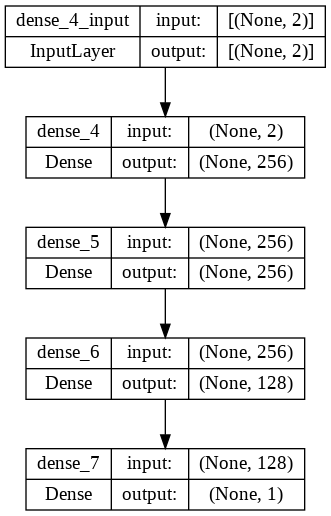

In [40]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)